# Datasets

There are two separate datasets:


1) Emission from rice cultivation
2) enteric fermentation

<img src="images/paddy1.jpg" alt="Paddy field">

Photo by <a href="https://unsplash.com/@priscilladupreez?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Priscilla Du Preez</a> on <a href="https://unsplash.com/s/photos/cattle?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

# Exploratory Data Anaylsis for Emission from Rice Cultivation

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
data = pd.read_csv('faostat-data/Emissions_Agriculture_Rice_Cultivation_E_All_Data_(Normalized).csv',  encoding='latin-1')

In [254]:
enteric_data = pd.read_csv('faostat-data/FAOSTAT_enteric_emm_9-7-2021.csv')

In [4]:
data.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Source Code,Source,Unit,Value,Flag,Note
0,2,Afghanistan,27,"Rice, paddy",5312,Area harvested,1961,1961,3050,FAO TIER 1,ha,210000.0,NaN,NaN
1,2,Afghanistan,27,"Rice, paddy",5312,Area harvested,1962,1962,3050,FAO TIER 1,ha,210000.0,NaN,NaN
2,2,Afghanistan,27,"Rice, paddy",5312,Area harvested,1963,1963,3050,FAO TIER 1,ha,210000.0,NaN,NaN
3,2,Afghanistan,27,"Rice, paddy",5312,Area harvested,1964,1964,3050,FAO TIER 1,ha,220000.0,NaN,NaN
4,2,Afghanistan,27,"Rice, paddy",5312,Area harvested,1965,1965,3050,FAO TIER 1,ha,220000.0,NaN,NaN


In [5]:
data.shape

(19660, 14)

In [6]:
data.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Year Code', 'Year', 'Source Code', 'Source', 'Unit', 'Value', 'Flag',
       'Note'],
      dtype='object')

In [7]:

data['Element'].unique()

array(['Area harvested', 'Emissions (CH4)'], dtype=object)

In [8]:
emm_all = pd.DataFrame(data.loc[data['Element']=='Emissions (CH4)'])

In [9]:
emm_all

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Source Code,Source,Unit,Value,Flag,Note
61,2,Afghanistan,27,"Rice, paddy",7225,Emissions (CH4),1961,1961,3050,FAO TIER 1,kilotonnes,29.4000,Fc,NaN
62,2,Afghanistan,27,"Rice, paddy",7225,Emissions (CH4),1962,1962,3050,FAO TIER 1,kilotonnes,29.4000,Fc,NaN
63,2,Afghanistan,27,"Rice, paddy",7225,Emissions (CH4),1963,1963,3050,FAO TIER 1,kilotonnes,29.4000,Fc,NaN
64,2,Afghanistan,27,"Rice, paddy",7225,Emissions (CH4),1964,1964,3050,FAO TIER 1,kilotonnes,30.8000,Fc,NaN
65,2,Afghanistan,27,"Rice, paddy",7225,Emissions (CH4),1965,1965,3050,FAO TIER 1,kilotonnes,30.8000,Fc,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19655,5873,OECD,27,"Rice, paddy",7225,Emissions (CH4),2017,2017,3050,FAO TIER 1,kilotonnes,1096.2172,A,NaN
19656,5873,OECD,27,"Rice, paddy",7225,Emissions (CH4),2018,2018,3050,FAO TIER 1,kilotonnes,1153.9394,A,NaN
19657,5873,OECD,27,"Rice, paddy",7225,Emissions (CH4),2019,2019,3050,FAO TIER 1,kilotonnes,1072.7629,A,NaN
19658,5873,OECD,27,"Rice, paddy",7225,Emissions (CH4),2030,2030,3050,FAO TIER 1,kilotonnes,1290.3509,A,NaN


In [10]:
emm_all.isnull().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Year Code          0
Year               0
Source Code        0
Source             0
Unit               0
Value              1
Flag               0
Note            9295
dtype: int64

In [11]:
emm_all['Value'].fillna((emm_all['Value'].mean()), inplace=True)

In [12]:
emm_all.isnull().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Year Code          0
Year               0
Source Code        0
Source             0
Unit               0
Value              0
Flag               0
Note            9295
dtype: int64

In [13]:
emm_all['Note'].unique()

array([nan, 'NC/CRF/BUR'], dtype=object)

It seems that the Note column does not seem to be important in our analysis for now, so we will drop that particular column.

In [14]:
emm_df = emm_all.drop(columns='Note')

In [16]:
#Replace China Mainland as also China so we can standardize it as one country
#rather than a separate country
emm_df["Area"].replace({"China, mainland": "China"}, inplace=True)

In [17]:
emm_df.shape

(9816, 13)

In [19]:
emm_df.nlargest(10, ['Value'])

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Source Code,Source,Unit,Value,Flag
15453,5000,World,27,"Rice, paddy",7225,Emissions (CH4),2017,2017,3050,FAO TIER 1,kilotonnes,24633.9476,A
15454,5000,World,27,"Rice, paddy",7225,Emissions (CH4),2018,2018,3050,FAO TIER 1,kilotonnes,24594.6544,A
15449,5000,World,27,"Rice, paddy",7225,Emissions (CH4),2013,2013,3050,FAO TIER 1,kilotonnes,24572.2603,A
15447,5000,World,27,"Rice, paddy",7225,Emissions (CH4),2011,2011,3050,FAO TIER 1,kilotonnes,24443.7283,A
15448,5000,World,27,"Rice, paddy",7225,Emissions (CH4),2012,2012,3050,FAO TIER 1,kilotonnes,24376.2483,A
15450,5000,World,27,"Rice, paddy",7225,Emissions (CH4),2014,2014,3050,FAO TIER 1,kilotonnes,24373.7814,A
15446,5000,World,27,"Rice, paddy",7225,Emissions (CH4),2010,2010,3050,FAO TIER 1,kilotonnes,24370.2680,A
15452,5000,World,27,"Rice, paddy",7225,Emissions (CH4),2016,2016,3050,FAO TIER 1,kilotonnes,24364.7890,A
15444,5000,World,27,"Rice, paddy",7225,Emissions (CH4),2008,2008,3050,FAO TIER 1,kilotonnes,24118.0360,A
15455,5000,World,27,"Rice, paddy",7225,Emissions (CH4),2019,2019,3050,FAO TIER 1,kilotonnes,24084.5452,A


Hmmm, that doesn't look right. The 'Area' column shows that the top 10 methane emitters from rice cultivation is from 'World'. Let's inspect all of the unique values from that particular column.

In [ ]:
all_area = list(emm_df['Area'].unique())

We have several observations based on aggregation of different categories of continents, country groups, etc. So we will need to drop these categories and solely focus on actual country names.

In [21]:
area_drop = [ 'World', 'Africa', 'Eastern Africa',
       'Middle Africa', 'Northern Africa', 'Southern Africa',
       'Western Africa', 'Americas', 'Northern America',
       'Central America', 'Caribbean', 'South America', 'Asia',
       'Central Asia', 'Eastern Asia', 'Southern Asia',
       'South-eastern Asia', 'Western Asia', 'Europe', 'Eastern Europe',
       'Southern Europe', 'Western Europe', 'Oceania',
       'Australia and New Zealand', 'Melanesia', 'Micronesia',
       'European Union (28)', 'European Union (27)',
       'Least Developed Countries', 'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries', 'Annex I countries',
       'Non-Annex I countries', 'OECD']

In [169]:
dropped_cat = set(all_area).difference(area_drop)

In [177]:
dropped_cat2 = set(all_area).difference(dropped_cat)

In [179]:
data = emm_df.set_index("Area")
area_drop_df = data.drop(dropped_cat2, axis=0).reset_index()

In [180]:
area_drop_df

,Area,Area Code,Item Code,Item,Element Code,Element,Year Code,Year,Source Code,Source,Unit,Value,Flag
0,Afghanistan,2,27,"Rice, paddy",7225,Emissions (CH4),1961,1961,3050,FAO TIER 1,kilotonnes,29.4000,Fc
1,Afghanistan,2,27,"Rice, paddy",7225,Emissions (CH4),1962,1962,3050,FAO TIER 1,kilotonnes,29.4000,Fc
2,Afghanistan,2,27,"Rice, paddy",7225,Emissions (CH4),1963,1963,3050,FAO TIER 1,kilotonnes,29.4000,Fc
3,Afghanistan,2,27,"Rice, paddy",7225,Emissions (CH4),1964,1964,3050,FAO TIER 1,kilotonnes,30.8000,Fc
4,Afghanistan,2,27,"Rice, paddy",7225,Emissions (CH4),1965,1965,3050,FAO TIER 1,kilotonnes,30.8000,Fc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7650,Zimbabwe,181,27,"Rice, paddy",7225,Emissions (CH4),2017,2017,3050,FAO TIER 1,kilotonnes,0.9297,Fc
7651,Zimbabwe,181,27,"Rice, paddy",7225,Emissions (CH4),2018,2018,3050,FAO TIER 1,kilotonnes,1.6549,Fc
7652,Zimbabwe,181,27,"Rice, paddy",7225,Emissions (CH4),2019,2019,3050,FAO TIER 1,kilotonnes,1.8242,Fc
7653,Zimbabwe,181,27,"Rice, paddy",7225,Emissions (CH4),2030,2030,3050,FAO TIER 1,kilotonnes,0.0854,Fc


In [232]:
area_drop_df.describe()

,Area Code,Item Code,Element Code,Year Code,Year,Source Code,Value
count,7655.000000,7655.0,7655.0,7655.000000,7655.000000,7655.000000,7655.000000
mean,124.973089,27.0,7225.0,1993.086349,1993.086349,3050.068060,226.724302
std,74.598147,0.0,0.0,18.766300,18.766300,0.251865,831.442510
min,2.000000,27.0,7225.0,1961.000000,1961.000000,3050.000000,0.000000
25%,58.000000,27.0,7225.0,1978.000000,1978.000000,3050.000000,0.910000
50%,117.000000,27.0,7225.0,1994.000000,1994.000000,3050.000000,6.693100
75%,184.000000,27.0,7225.0,2007.000000,2007.000000,3050.000000,54.894900
max,351.000000,27.0,7225.0,2050.000000,2050.000000,3051.000000,6497.917700


In [24]:
data = area_drop_df.copy()

Now, let's identify the top 10 countries that emits methane

In [25]:
data.nlargest(10, ['Value'])

,Area,Area Code,Item Code,Item,Element Code,Element,Year Code,Year,Source Code,Source,Unit,Value,Flag
1368,China,351,27,"Rice, paddy",7225,Emissions (CH4),1976,1976,3050,FAO TIER 1,kilotonnes,6497.9177,A
1367,China,351,27,"Rice, paddy",7225,Emissions (CH4),1975,1975,3050,FAO TIER 1,kilotonnes,6412.7204,A
1369,China,351,27,"Rice, paddy",7225,Emissions (CH4),1977,1977,3050,FAO TIER 1,kilotonnes,6374.7669,A
1366,China,351,27,"Rice, paddy",7225,Emissions (CH4),1974,1974,3050,FAO TIER 1,kilotonnes,6372.4108,A
1490,China,41,27,"Rice, paddy",7225,Emissions (CH4),1976,1976,3050,FAO TIER 1,kilotonnes,6354.4704,Fc
1364,China,351,27,"Rice, paddy",7225,Emissions (CH4),1972,1972,3050,FAO TIER 1,kilotonnes,6301.3902,A
1365,China,351,27,"Rice, paddy",7225,Emissions (CH4),1973,1973,3050,FAO TIER 1,kilotonnes,6288.8693,A
1489,China,41,27,"Rice, paddy",7225,Emissions (CH4),1975,1975,3050,FAO TIER 1,kilotonnes,6268.7630,Fc
1363,China,351,27,"Rice, paddy",7225,Emissions (CH4),1971,1971,3050,FAO TIER 1,kilotonnes,6264.2135,A
1491,China,41,27,"Rice, paddy",7225,Emissions (CH4),1977,1977,3050,FAO TIER 1,kilotonnes,6233.1087,Fc


The top 10 contributors to rice cultivation emission are all from China towards the end of 70s era. In this case, we would need to narrow down our analysis by looking into the data within the last 10 years as an example.

In [26]:
lastten = pd.DataFrame(data.loc[(data['Year'] > 2009) & (data['Year'] < 2030)])

In [27]:
lastten.shape

(1393, 13)

In [28]:
last_ten_years = lastten.copy()

In [29]:
mean_ten_years = last_ten_years.groupby(['Area'])['Value'].mean()

In [30]:
mean_ten_df = mean_ten_years.to_frame().reset_index()

In [31]:
mean_ten_df.nlargest(10, 'Value')

,Area,Value
21,China,5342.923550
52,India,4494.329318
53,Indonesia,2417.759960
106,Thailand,1753.634370
85,Philippines,1557.152530
119,Viet Nam,1395.840882
74,Myanmar,1109.552530
6,Bangladesh,1011.463446
115,United States of America,508.617575
16,Cambodia,459.181130


In [32]:
topten_10years = pd.DataFrame(mean_ten_df.nlargest(10, 'Value'))

In [59]:
sns.set_style("dark")
sns.set_theme()

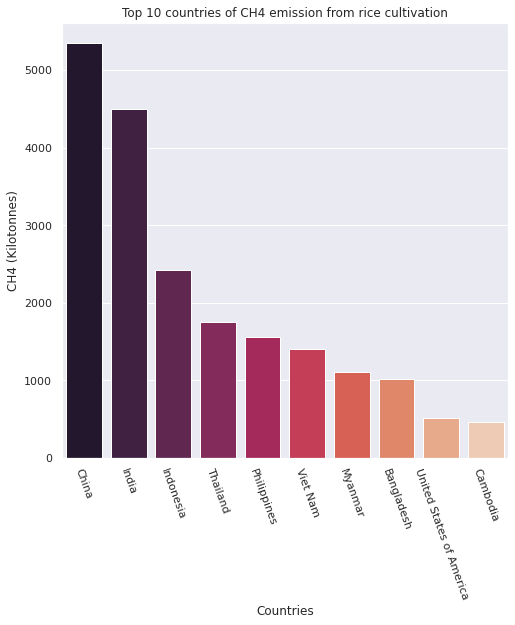

In [187]:
plt.figure(figsize=(8,8))
plot = sns.barplot(data=topten_10years, x='Area', y='Value', palette='rocket')
plt.title('Top 10 countries of CH4 emission from rice cultivation')
plt.setp(plot.get_xticklabels(), rotation=-70)
plt.xlabel('Countries')
plt.ylabel('CH4 (Kilotonnes)')
plt.show()

In [61]:
cina = pd.DataFrame(last_ten_years.loc[(last_ten_years['Area'] == 'China')])

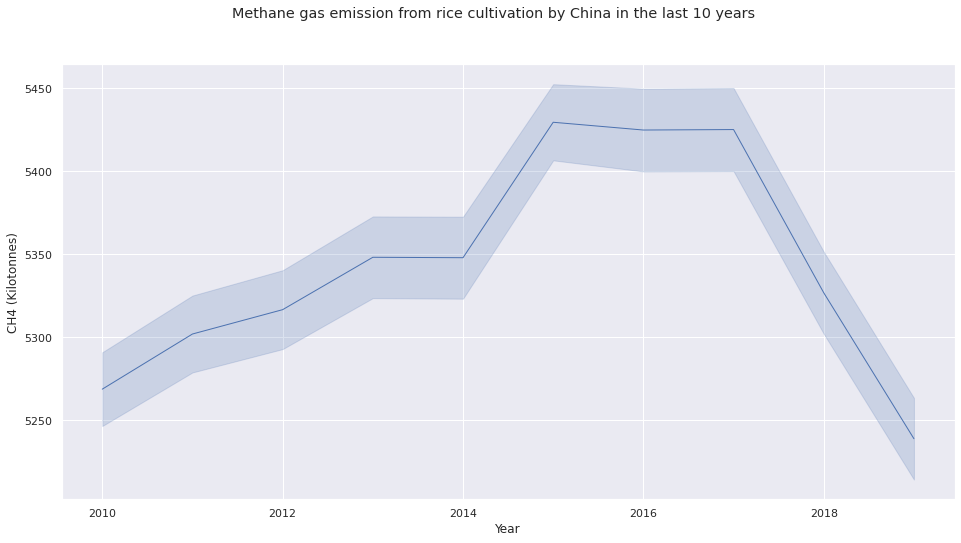

In [203]:
f = plt.figure(figsize=(16,8))
sns.lineplot(data=cina, x='Year', y='Value',  lw=1, palette='flare')
plt.suptitle('Methane gas emission from rice cultivation by China in the last 10 years')
plt.xlabel('Year')
plt.ylabel('CH4 (Kilotonnes)')
plt.show()
f.tight_layout()

In [154]:
all_area = list(emm_df['Area'].unique())

In [155]:
continents = ['South America', 'Northern America', 'Africa', 'Asia', 'Europe', 'Oceania']

In [156]:
dropped = set(all_area).difference(continents)

In [157]:
no_countries = emm_df.set_index("Area")
no_countries = no_countries.drop(dropped, axis=0).reset_index()

In [158]:
no_countries_lastten = pd.DataFrame(no_countries.loc[(no_countries['Year'] > 2009) & (no_countries['Year'] < 2030)])

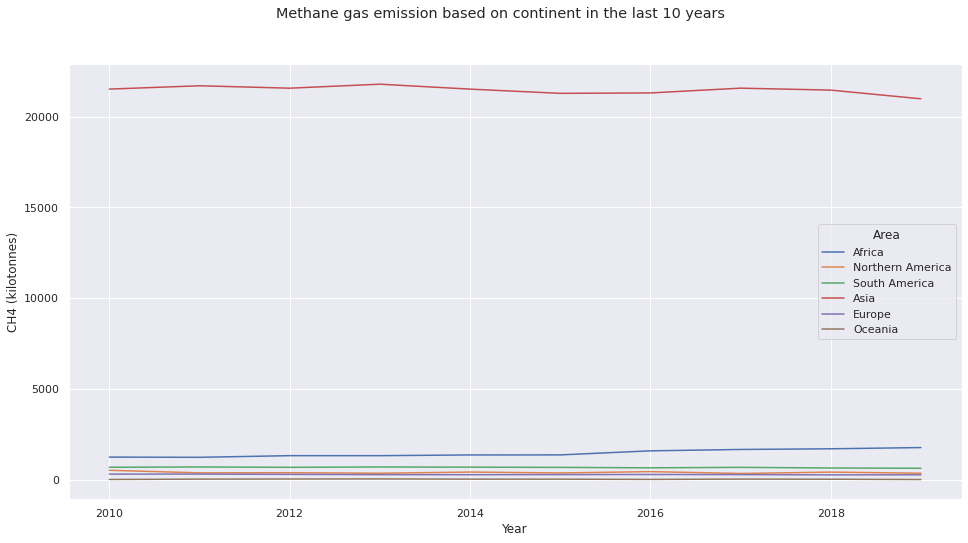

In [160]:
f = plt.figure(figsize=(16,8))
sns.lineplot(data=no_countries_lastten,x="Year", y="Value", hue="Area")
plt.ylabel('CH4 (kilotonnes)')
plt.suptitle('Methane gas emission based on continent in the last 10 years')
plt.show()
f.tight_layout()

<img src="images/bovine.jpg" alt="Cattle in the field">

Photo by <a href="https://unsplash.com/@timrael?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Timur Kozmenko</a> on <a href="https://unsplash.com/s/photos/paddy-field?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

# Exploratory Data Anaylsis for Enteric Fermentation

In [248]:
enteric_data.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GE,Enteric Fermentation,2,Afghanistan,5111,Stocks,1107,Asses,1961,1961,3050,FAO TIER 1,Head,1.300000e+06,NaN,Official data,NaN
1,GE,Enteric Fermentation,2,Afghanistan,7225,Emissions (CH4),1107,Asses,1961,1961,3050,FAO TIER 1,kilotonnes,1.300000e+01,Fc,Calculated data,NaN
2,GE,Enteric Fermentation,2,Afghanistan,5111,Stocks,1107,Asses,1962,1962,3050,FAO TIER 1,Head,8.518500e+05,NaN,Official data,NaN
3,GE,Enteric Fermentation,2,Afghanistan,7225,Emissions (CH4),1107,Asses,1962,1962,3050,FAO TIER 1,kilotonnes,8.518500e+00,Fc,Calculated data,NaN
4,GE,Enteric Fermentation,2,Afghanistan,5111,Stocks,1107,Asses,1963,1963,3050,FAO TIER 1,Head,1.001112e+06,NaN,Official data,NaN


In [249]:
enteric_data.columns

Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Source Code',
       'Source', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [250]:
enteric_data.isnull().sum()

Domain Code              0
Domain                   0
Area Code (FAO)          0
Area                     0
Element Code             0
Element                  0
Item Code                0
Item                     0
Year Code                0
Year                     0
Source Code              0
Source                   0
Unit                     0
Value                    0
Flag                 23815
Flag Description         0
Note                173784
dtype: int64

In [255]:
ent_to_drop = ['Domain Code','Area Code (FAO)', 'Element Code', 'Item Code', 'Flag', 'Note', 'Flag Description', 'Source Code', 'Source']

In [256]:
entferm = enteric_data.drop(columns=ent_to_drop)

In [267]:
entferm.head()

,Domain,Area,Element,Item,Year Code,Year,Unit,Value
0,Enteric Fermentation,Afghanistan,Stocks,Asses,1961,1961,Head,1.300000e+06
1,Enteric Fermentation,Afghanistan,Emissions (CH4),Asses,1961,1961,kilotonnes,1.300000e+01
2,Enteric Fermentation,Afghanistan,Stocks,Asses,1962,1962,Head,8.518500e+05
3,Enteric Fermentation,Afghanistan,Emissions (CH4),Asses,1962,1962,kilotonnes,8.518500e+00
4,Enteric Fermentation,Afghanistan,Stocks,Asses,1963,1963,Head,1.001112e+06


In [258]:
entferm_by_emission = entferm.copy()

In [259]:
drop_elm = ['Stocks']
entferm_by_emission = entferm_by_emission.set_index('Element')
entferm_by_emission = entferm_by_emission.drop(drop_elm, axis=0).reset_index()

In [260]:
entferm_10yrs = pd.DataFrame(entferm_by_emission.loc[(entferm_by_emission['Year'] > 2009) & (entferm_by_emission['Year'] < 2020)])

In [261]:
labels = list(entferm_by_emission['Item'].unique())

In [262]:
entferm_10yrs.describe()

,Year Code,Year,Value
count,15795.000000,15795.000000,15795.000000
mean,2014.496929,2014.496929,66.109299
std,2.869106,2.869106,396.339878
min,2010.000000,2010.000000,0.000000
25%,2012.000000,2012.000000,0.072000
50%,2014.000000,2014.000000,1.239000
75%,2017.000000,2017.000000,15.997150
max,2019.000000,2019.000000,11123.373700


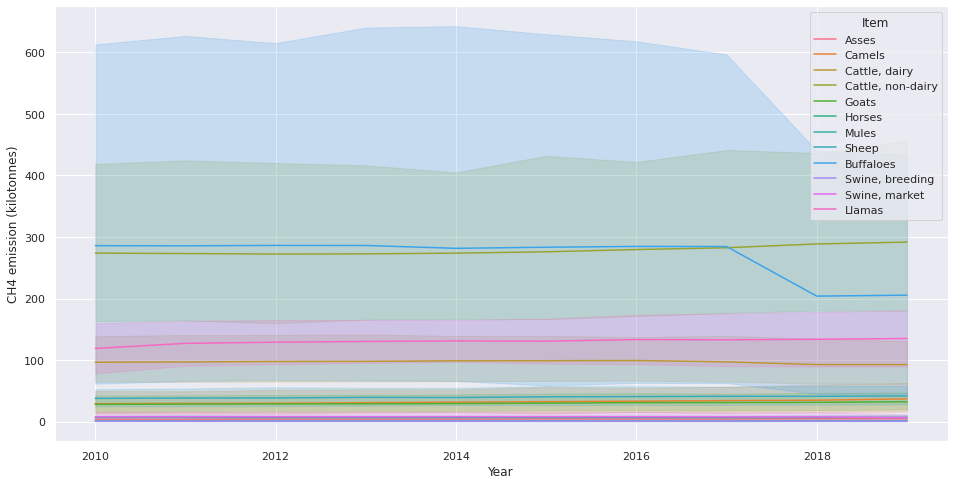

In [263]:
f = plt.figure(figsize=(16,8))
plot = sns.lineplot(data=entferm_10yrs, x='Year', y='Value', hue='Item')
plt.xlabel('Year')
plt.ylabel('CH4 emission (kilotonnes)')
plt.show()